c:\Users\au616584\OneDrive - Aarhus Universitet\Datalogi\Deep_learning\License_plate\danish_licensees_fixed_labels\train
\0-0_0-1046&645_1303&757-0-0.jpg
28784
(1107, 1476)
28730
(1100, 1466)
36720
(1056, 1584)
6916
(1440, 2560)
8844
(504, 685)
6556
(602, 465)
5168
(601, 465)
4440
(628, 507)
5282
(556, 463)
3782
(422, 460)
17385
(1053, 1583)
4658
(724, 516)
4830
(812, 497)
7752
(780, 1353)
3072
(387, 511)
17430
(1105, 1473)
4800
(927, 803)
15656
(1100, 1472)
11524
(904, 1306)
24732
(1077, 1407)
3416
(661, 495)
5148
(836, 618)
11880
(822, 747)
15312
(980, 819)
4371
(916, 722)
14178
(713, 1582)
19872
(1058, 823)
8772
(936, 777)
15498
(911, 798)
18166
(1022, 827)
15892
(1097, 814)
7452
(846, 769)
16884
(1014, 760)
14280
(868, 830)
4650
(632, 471)
13237
(849, 800)
16147
(993, 766)
11330
(1018, 821)
10761
(807, 754)
9016
(853, 801)
14945
(980, 811)
14400
(1070, 817)
8976
(1089, 814)
10215
(1104, 828)
7380
(1086, 825)
7080
(930, 796)
5355
(898, 808)
5250
(1063, 806)
12636
(902, 1077)
21300
(

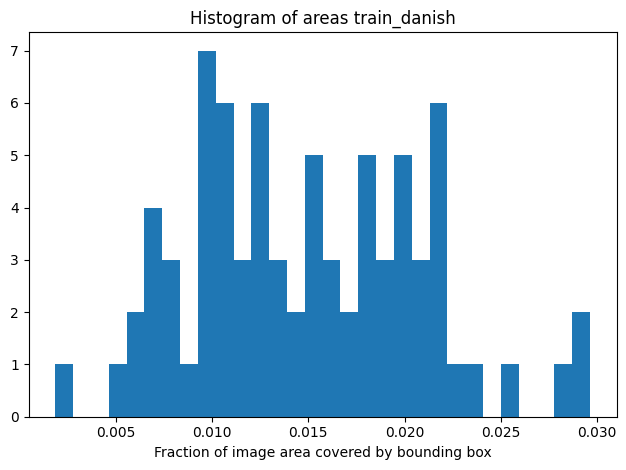

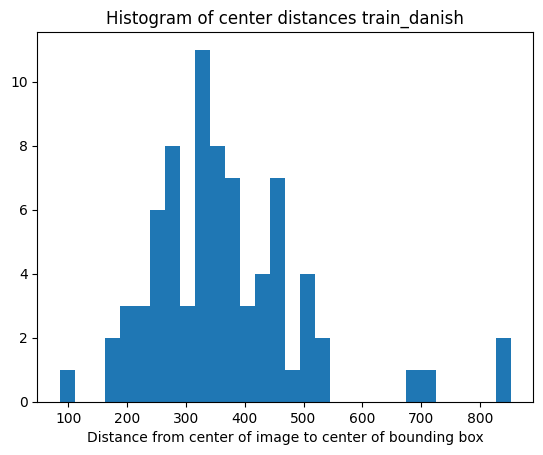

\00360785590278-91_265-311&485_406&524-406&524_313&520_311&485_402&489-0_0_3_24_28_24_31_33-117-16.jpg
3705
(1160, 720)
3774
(1160, 720)
3815
(1160, 720)
3990
(1160, 720)
4070
(1160, 720)
4158
(1160, 720)
4256
(1160, 720)
4366
(1160, 720)
4368
(1160, 720)
4403
(1160, 720)
4440
(1160, 720)
4756
(1160, 720)
4872
(1160, 720)
5207
(1160, 720)
5175
(1160, 720)
5375
(1160, 720)
5504
(1160, 720)
5699
(1160, 720)
5934
(1160, 720)
6072
(1160, 720)
6300
(1160, 720)
6192
(1160, 720)
6468
(1160, 720)
6390
(1160, 720)
6424
(1160, 720)
6566
(1160, 720)
6532
(1160, 720)
6578
(1160, 720)
6713
(1160, 720)
6624
(1160, 720)
6800
(1160, 720)
6864
(1160, 720)
6909
(1160, 720)
7008
(1160, 720)
7072
(1160, 720)
7100
(1160, 720)
7200
(1160, 720)
7176
(1160, 720)
7420
(1160, 720)
7344
(1160, 720)
7350
(1160, 720)
7379
(1160, 720)
7400
(1160, 720)
7497
(1160, 720)
7632
(1160, 720)
7632
(1160, 720)
7700
(1160, 720)
7526
(1160, 720)
7685
(1160, 720)
7791
(1160, 720)
7644
(1160, 720)
7776
(1160, 720)
7844
(1160, 7

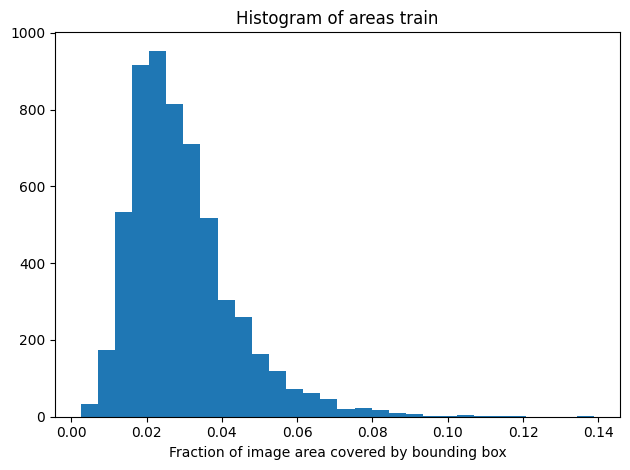

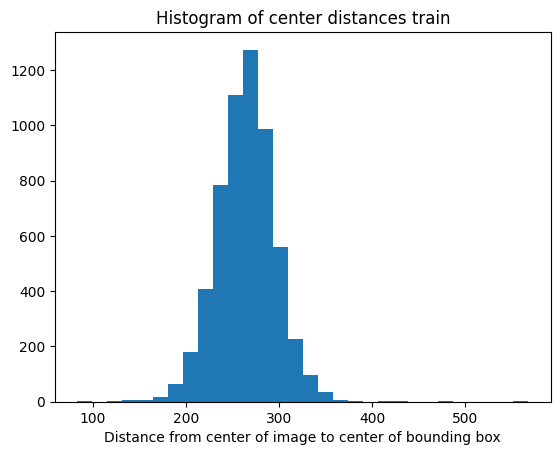

<Figure size 640x480 with 0 Axes>

In [51]:
import os
import matplotlib.pyplot as plt
from imutils import paths
import cv2

train_path_for_analysis = os.path.join(os.getcwd(), 'CCPD', 'train')
train_danish_for_analysis = os.path.join(os.getcwd(), 'danish_licensees_fixed_labels', 'train')
print(train_danish_for_analysis)
#get all images in train_path_for_analysis
def parse_point(point_str):
    return tuple(int(coord) for coord in point_str.split('&'))

def get_histograms(path, dataset_name):
    img_paths_full = [p for p in paths.list_images(path)]
    
    #remove the path to the image
    img_paths = [p.replace(path, '') for p in img_paths_full]
    print(img_paths[0])
    areas = []

    img_fracs = []
    center_dists = []
    
    for i,file_name in enumerate(img_paths):
        parts = file_name.split('-')
        points = [parse_point(part) for part in parts[2].split('_')]
        
        #calculate area
        area = (points[1][0] - points[0][0]) * (points[1][1] - points[0][1])
        
        #load image and get size
        # print(f"path: {path}")
        # print(os.path.join(path, file_name))

        img = cv2.imread(img_paths_full[i])
        img_size = img.shape[:2]
        # print(area), print(img_size)
        
        area_img = img_size[0] * img_size[1]
        frac = area/area_img
        img_fracs.append(frac)

        #calculate centeer of bb to center of img
        center_x = (points[0][0] + points[1][0]) / 2
        center_y = (points[0][1] + points[1][1]) / 2
        center_img_x = 1160/2
        center_img_y = 720/2
        dist = ((center_x - center_img_x)**2 + (center_y - center_img_y)**2)**0.5
        center_dists.append(dist)
        



    #histogram of areas
    
    plt.title(f'Histogram of areas {dataset_name}')
    plt.hist(img_fracs, bins=30)
    plt.xlabel('Fraction of image area covered by bounding box')
    #make tight
    plt.tight_layout()
    plt.show()
    plt.clf()
    plt.title(f'Histogram of center distances {dataset_name}')
    plt.hist(center_dists, bins=30)
    plt.xlabel('Distance from center of image to center of bounding box')
    plt.show()
    plt.clf()
get_histograms(train_danish_for_analysis, 'train_danish')
get_histograms(train_path_for_analysis, 'train')

In [ ]:
#labels for images are given as top left and bottom right corner but we want bottom left and top right

In [47]:
path_train = os.path.join(os.getcwd(), 'danish_licenses_fixing_labels', 'train')
path_val = os.path.join(os.getcwd(), 'danish_licenses_fixing_labels', 'val')
path_test = os.path.join(os.getcwd(), 'danish_licenses_fixing_labels', 'test')
#create new folders danish_licensees_fixed_labels/train/val/test
new_path_train = os.path.join(os.getcwd(), 'danish_licensees_fixed_labels', 'train')
new_path_val = os.path.join(os.getcwd(), 'danish_licensees_fixed_labels', 'val')
new_path_test = os.path.join(os.getcwd(), 'danish_licensees_fixed_labels', 'test')
os.makedirs(new_path_train, exist_ok=True)
os.makedirs(new_path_val, exist_ok=True)
os.makedirs(new_path_test, exist_ok=True)

In [48]:
def rename_files(source_folder, destination_folder):
    filenames = os.listdir(source_folder)
    for filename in filenames:
        #Sample input file name: 0-0_0-65&458_156&417-0-0
        parts = filename.split('-')
        points = [parse_point(part) for part in parts[2].split('_')]
        #swap points
        x_min = points[0][0]
        x_max = points[1][0]
        y_min = points[1][1]
        y_max = points[0][1]
        #create new file name
        new_filename = f"{parts[0]}-{parts[1]}-{x_min}&{y_min}_{x_max}&{y_max}-{parts[3]}-{parts[4]}"
        #copy file to new folder
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, new_filename)
        os.rename(source_path, destination_path)
rename_files(path_train, new_path_train)
rename_files(path_val, new_path_val)
rename_files(path_test, new_path_test)
